### Feature Engineering

Goal: To Predict the Medical Charges

In [1]:
pip install ydata_profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder , OrdinalEncoder
import warnings
from sklearn.compose import ColumnTransformer   
from sklearn.preprocessing import FunctionTransformer
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Dataset:


In [3]:
df=pd.read_csv(r"C:\Users\PC\Downloads\archive (1).zip")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in the data.

### Outliers

<Axes: xlabel='bmi'>

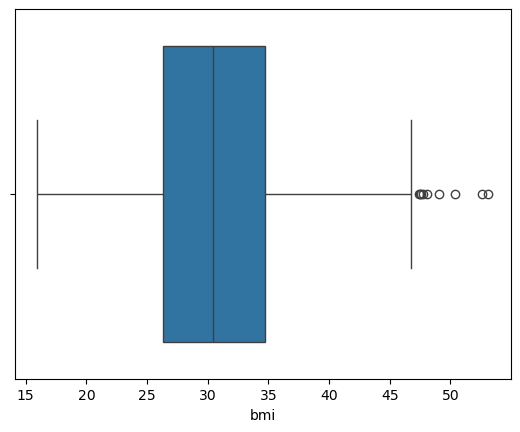

In [9]:
sns.boxplot(x=df.bmi)

<Axes: xlabel='bmi', ylabel='Count'>

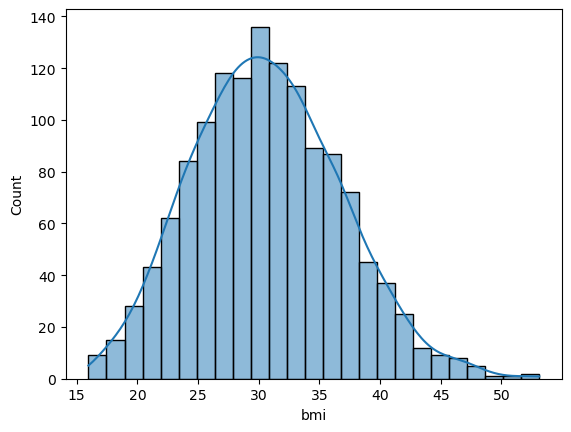

In [10]:
sns.histplot(x=df.bmi, kde=True)

Handling the outliers by winsorization techinque(coz as we can see it's near to normal distribution and we can't remove the extreme bmi values as it is imp)

In [11]:
from scipy.stats.mstats import winsorize
trim_percentage = 0.025
df['bmi'] = winsorize(df['bmi'],limits=trim_percentage)

<Axes: xlabel='bmi'>

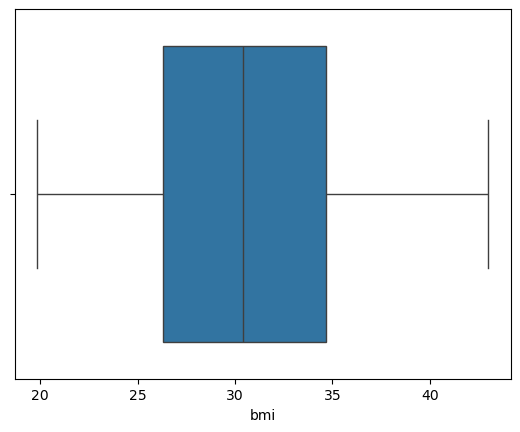

In [12]:
sns.boxplot(x=df.bmi)

In [13]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [14]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [15]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [16]:
df['sex'] = pd.get_dummies(df['sex'],prefix='sex',drop_first=True)
df['sex'] = df['sex'].astype(int)
df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int32

In [17]:

df['smoker']=(df['smoker'].map({'no':1,'yes':0}))
print(df['smoker'])

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    1
1335    1
1336    1
1337    0
Name: smoker, Length: 1338, dtype: int64


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['region']=encoder.fit_transform(df["region"])
print(df['region'])

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int32


In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,3,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,1,21984.47061
4,32,1,28.880,0,1,1,3866.85520


Here male = 0 and smoker yes = 0
region
southeast    2
southwest    3 
northwest    1
northeast    4

<Axes: xlabel='bmi', ylabel='Count'>

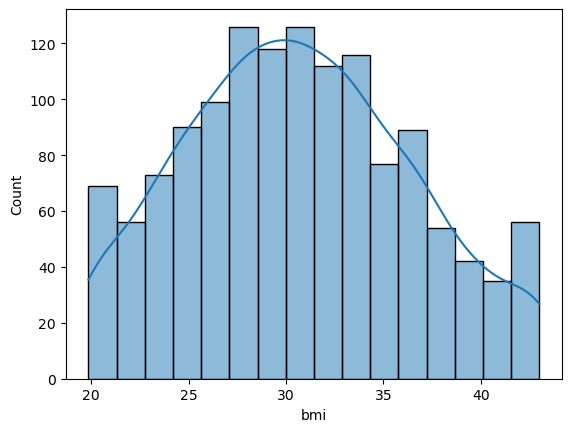

In [20]:
sns.histplot(x=df.bmi, kde=True)

Transformation

In [21]:
df['bmi']=np.sqrt(df['bmi'])
df['bmi']

0       5.282045
1       5.811196
2       5.744563
3       4.764976
4       5.374012
          ...   
1333    5.565070
1334    5.649779
1335    6.070420
1336    5.079370
1337    5.391660
Name: bmi, Length: 1338, dtype: float64

<Axes: xlabel='bmi', ylabel='Count'>

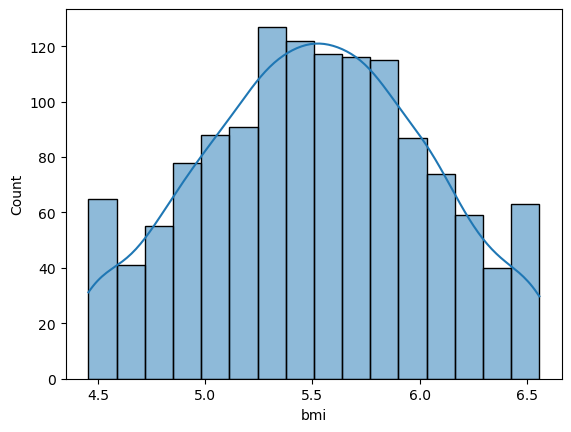

In [22]:
sns.histplot(x=df.bmi, kde=True)